In [1]:
import tensorflow as tf
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    image_size=(224, 224),
    batch_size=32,
    label_mode="categorical"
)

Found 24998 files belonging to 2 classes.


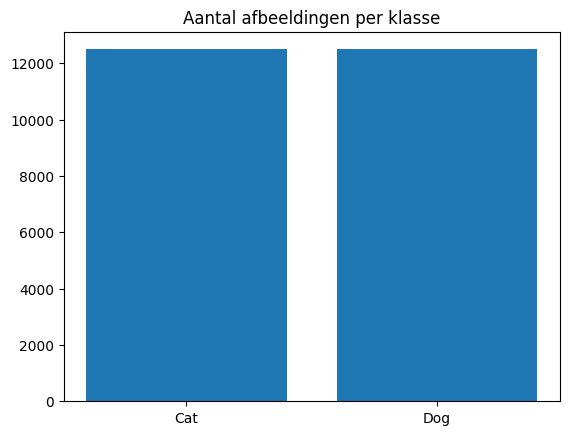

In [3]:
cat_count = len(os.listdir("train/Cat"))
dog_count = len(os.listdir("train/Dog"))
cat_count, dog_count

plt.bar(["Cat", "Dog"], [cat_count, dog_count])
plt.title("Aantal afbeeldingen per klasse")
plt.show()

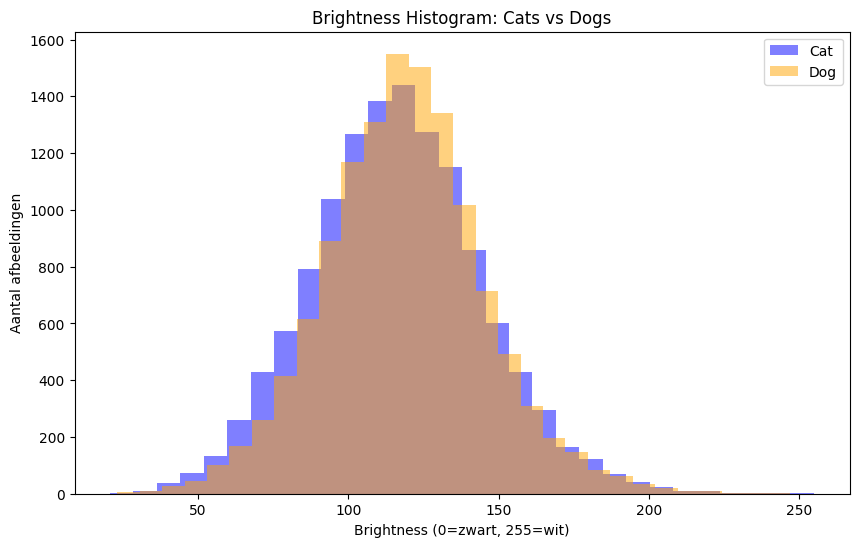

In [ ]:
# laat zien waar de afbeeldingen staan
folders = {
    "Cat": "train/Cat",
    "Dog": "train/Dog"
}

# lege lijst waar de helderheid word opgeslagen
brightness_data = {
    "Cat": [],
    "Dog": []
}

# opent afbeelding en zet om in grijswaarden (L betekent greyscaling)
# maakt een numpy array aan en berekent de gemiddelde helderheid
def get_brightness(img_path):
    img = Image.open(img_path).convert('L')
    arr = np.array(img)
    return arr.mean()

# loopt door alle bestanden heen in de juiste map 
# berekent de helderheid en slaat deze op in de juiste lijst
for label, folder in folders.items():
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        try:
            brightness = get_brightness(file_path)
            brightness_data[label].append(brightness)
        except Exception as e:
            print(f"Fout bij {file_path}: {e}")

# de helderheid van katten in het blauw en honden in het oranje
# verdeeld 0-255 in 30 stukken
# alpha zorgt dat het een beetje doorzichtig is zodat je de overlappingen kan zien
# titels en labels toevoegen voor duidelijkheid
plt.figure(figsize=(10,6))
plt.hist(brightness_data["Cat"], bins=30, alpha=0.5, label="Cat", color='blue')
plt.hist(brightness_data["Dog"], bins=30, alpha=0.5, label="Dog", color='orange')
plt.xlabel("Brightness (0=zwart, 255=wit)")
plt.ylabel("Aantal afbeeldingen")
plt.title("Brightness Histogram: Cats vs Dogs")
plt.legend()
plt.show()



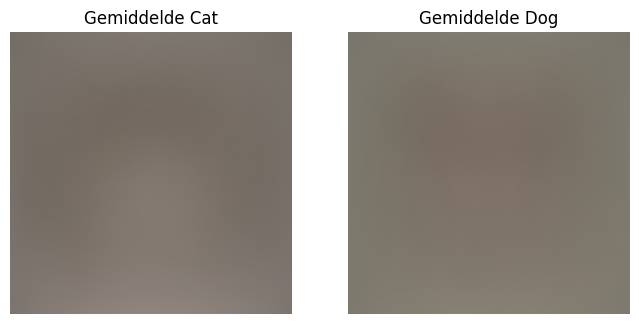

In [ ]:

def average_image(folder):
    imgs = []
    for fname in os.listdir(folder):
        path = os.path.join(folder, fname)
        try:
            img = Image.open(path).convert("RGB").resize((224, 224))
            imgs.append(np.array(img))
        except Exception as e:
            print("Skipping:", path, "Error:", e)
    return np.mean(np.stack(imgs), axis=0).astype(np.uint8)

avg_cat = average_image("train/Cat")
avg_dog = average_image("train/Dog")

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Gemiddelde Cat")
plt.imshow(avg_cat)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Gemiddelde Dog")
plt.imshow(avg_dog)
plt.axis("off")

plt.show()
